# Práctica tres

Grupo 14:
* Joaquín Ibáñez Penalva
* Aurora Zuoris

Para la realización de esta práctica  se usará la librería de numpy, pandas, matplotlib y sklearn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('precio_casas.csv', sep=';')
df.head()

,Mediana ingresos,Mediana antiguedad,Num. hab. promedio,Num. dorm. promedio,Poblacion,Ocup. promedio,Latitud,Longitud,Mediana precio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Ejercicio 1

Mediana ingresos: 0.47344749180719903
Mediana antiguedad: 0.011156305266710742
Num. hab. promedio: 0.023088282755354128
Num. dorm. promedio: 0.0021809379116133343
Poblacion: 0.0006076066693254667
Ocup. promedio: 0.0005634647738501641
Latitud: 0.020782185428578348
Longitud: 0.0021129297054044427


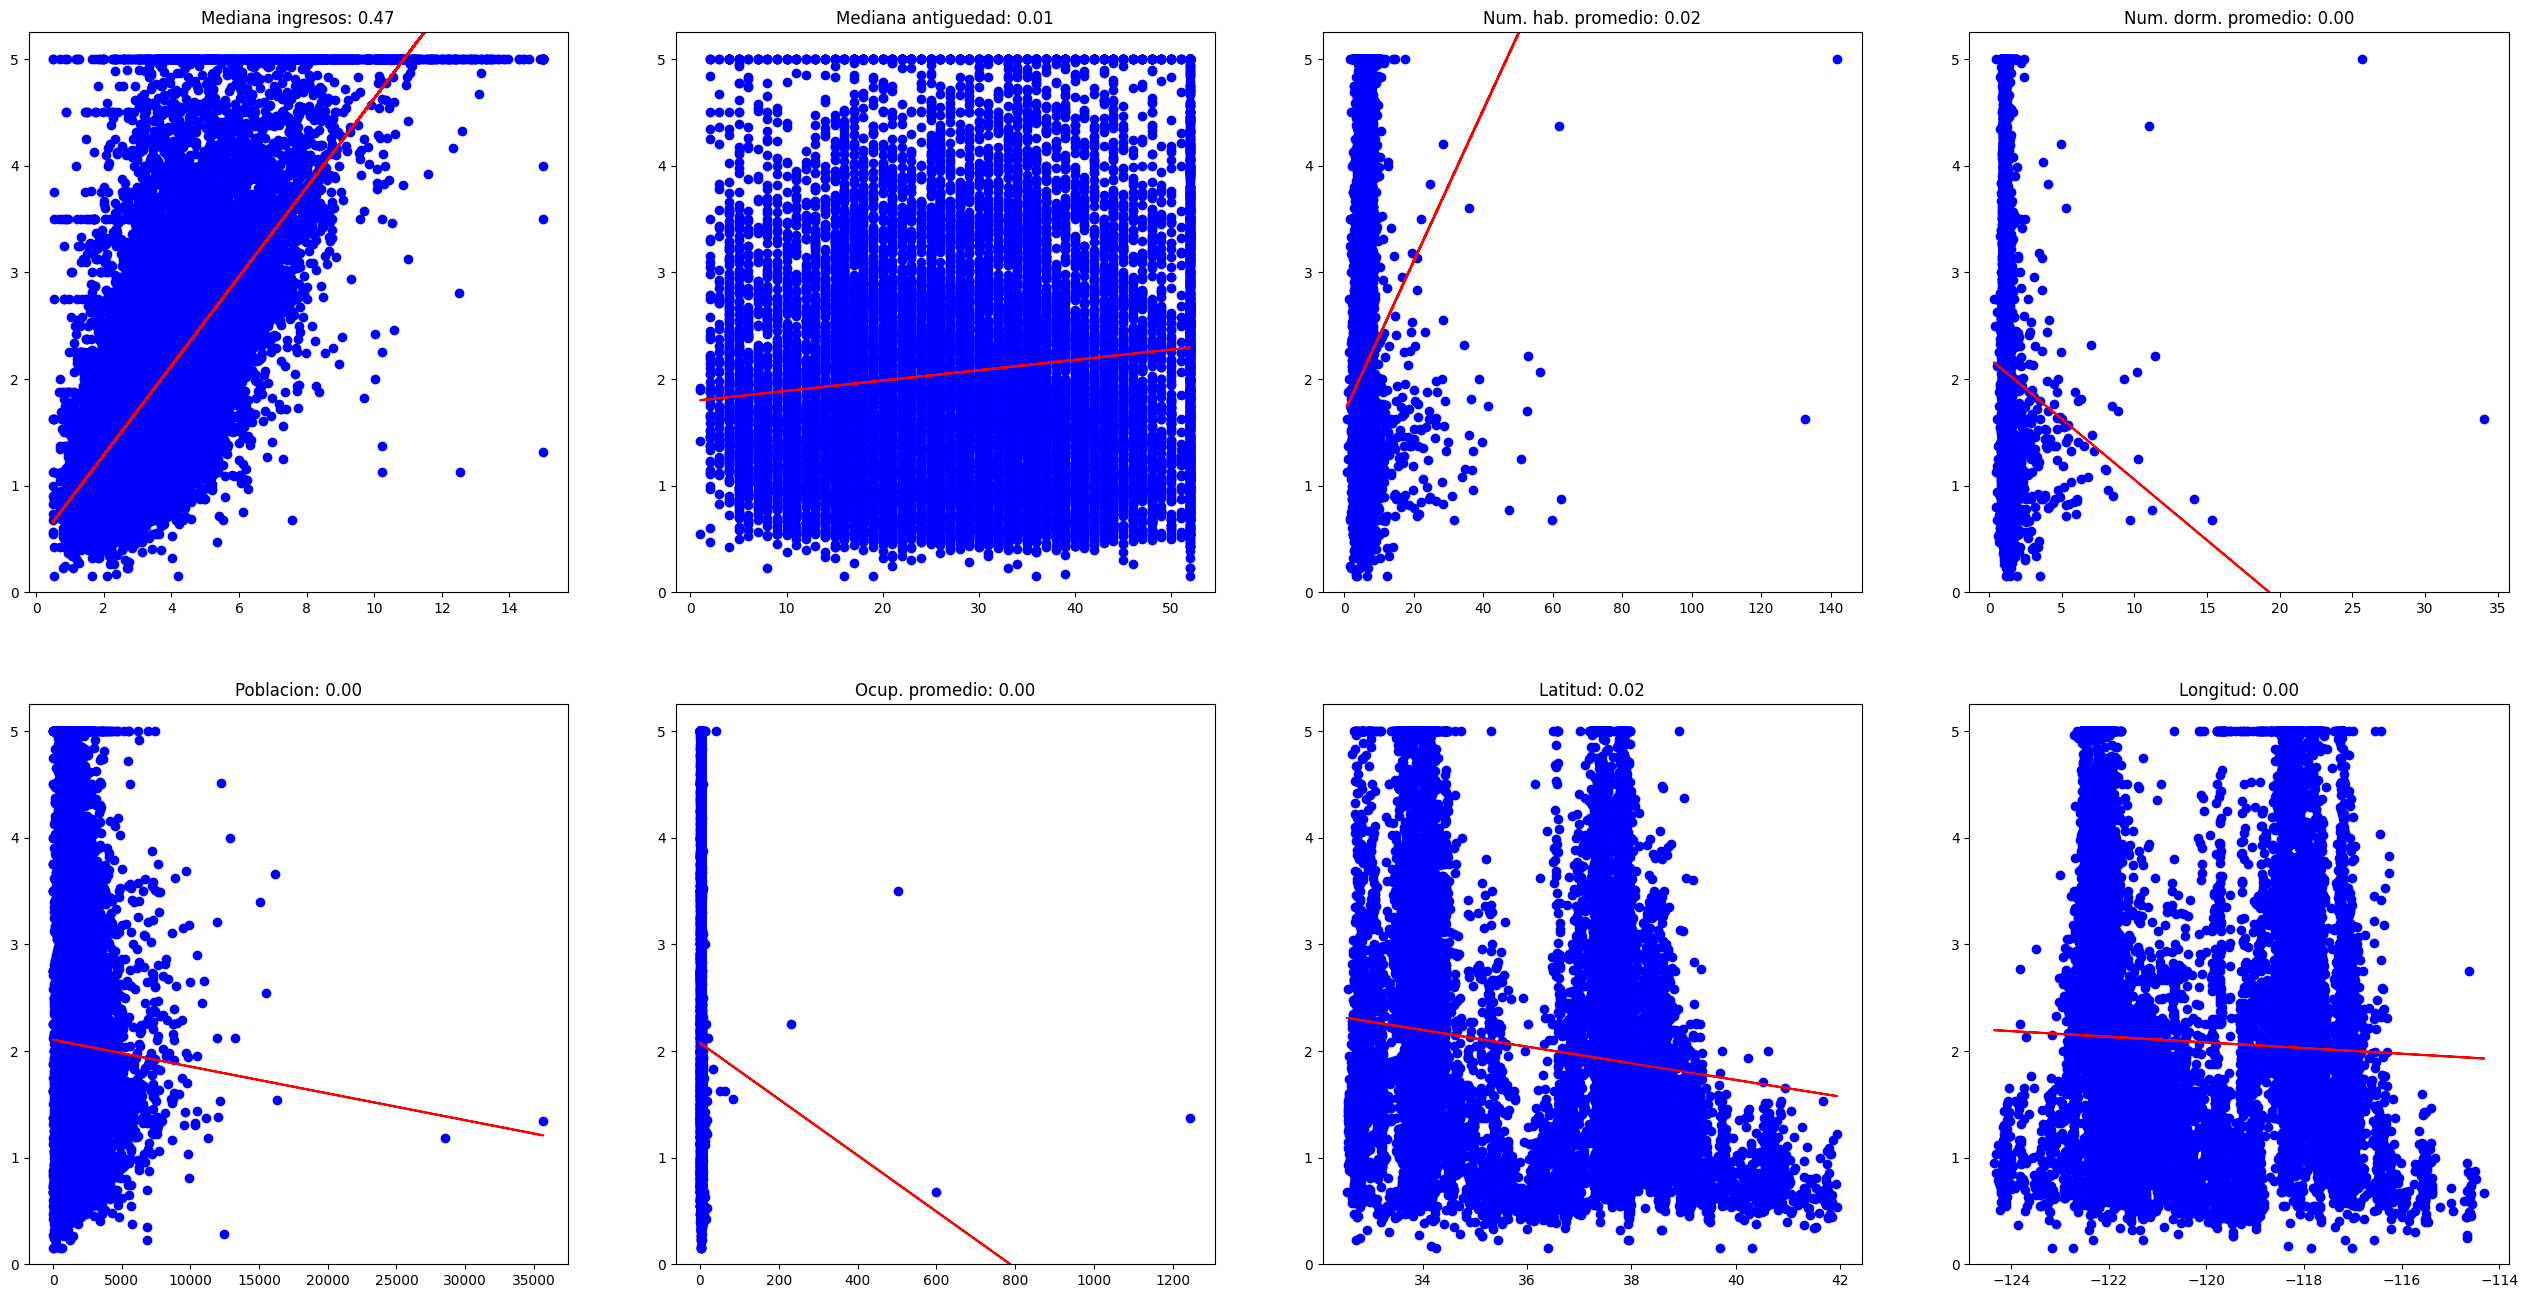

In [3]:
data = df.to_numpy()
x = data[:, :-1] # todas las filas, todas las columnas menos la última
y = data[:, -1] # todas las filas, la última columna
#crear vectores de la matriz de datos
#print(df.columns)
fig, ax = plt.subplots(2, 4, figsize=(32, 16))
idx_to_r2 = []
for i, (header, vec) in enumerate(zip(df.columns, x.T)):
    col = vec.reshape(-1, 1)
    #print(header, col)
    reg = lm.LinearRegression().fit(col, y)
    r2 = r2_score(y, reg.predict(col))
    idx_to_r2.append((i, r2))
    print(f"{header}: {r2}")
    ax[i // 4, i % 4].scatter(vec, y, color='blue')
    ax[i // 4, i % 4].plot(col, col * reg.coef_[0] + reg.intercept_, color='red')
    ax[i // 4, i % 4].set_title(f"{header}: {r2:.2f}")
    ax[i // 4, i % 4].set_ylim(0, 1.05 * y.max())


# Ejercicio 2

Primero se dividen los datos en un conjunto de entrenamiento y otro de test.

In [4]:
data = df.to_numpy()

X, y = data[:, :-1], data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape, )

(14448, 8) (14448,)


In [8]:
ordered_cols = [x for x, _ in sorted(idx_to_r2, key=lambda x: x[1], reverse=True)]
print(ordered_cols)

[0, 2, 6, 1, 3, 7, 4, 5]


In [14]:
rmse_collection = []

for i in range(1, 9):
    lim_cols = ordered_cols[:i]
    model = lm.LinearRegression()
    model.fit(X_train[:, lim_cols], y_train)
    y_pred = model.predict(X_test[:, lim_cols])
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_collection.append(rmse)

data = {
    'Features': df.columns[ordered_cols],
    'RMSE': rmse_collection,
}

pd.DataFrame(data)

,Features,RMSE
0,Mediana ingresos,0.851245
1,Num. hab. promedio,0.854471
2,Latitud,0.847382
3,Mediana antiguedad,0.818733
4,Num. dorm. promedio,0.807254
5,Longitud,0.739093
6,Poblacion,0.739285
7,Ocup. promedio,0.736986
